<a href="https://colab.research.google.com/github/DCbsS/Trabajo_Py_Basico/blob/main/Trabajo_Py_Basico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
#Si se corre en colab
#ruta='/content/lista.xlsx'
#database=pd.read_excel(ruta)

In [19]:
print('Bienvenido')
print('0: Usar un excel ya existente')
print('1: Crear uno nuevo')
desicion=int(input('Ingrese: '))

if desicion==0:
  ruta=input('Porfavor ingrese la ruta del archivo(.xlsx): ')
  database=pd.read_excel(ruta)
elif desicion==1:
  n_colum=int(input('Ingrese numero de columnas: '))
  t_colum=[]
  for i in range(n_colum):
    t_colum.append(input('Ingrese elnombre de la columna {}'.format(i)))
  database=pd.DataFrame(columns=t_colum)
else:
  print('Adios')
if database.empty==True:
  pass
else:
  continuar="S"
  while continuar=="S":
    database.to_excel('lista.xlsx')
    menu()
    continuar=input('S para volver al menu: ').upper()
  print("----------------Adios----------------")

Bienvenido
0: Usar un excel ya existente
1: Crear uno nuevo


KeyboardInterrupt: ignored

In [3]:
def menu():
  global database
  print('0: Ingresar datos(fila)')
  print('1: Buscar datos(igual a)')
  print('2: Filtrar por caracteristica(mayor a,menor a)')
  print('3: Ingresar caracteristica(columna)')
  print('4: Datos estadisticos basicos')
  print('5: Grafica pastel')
  print('6: Grafica de barras')
  print('7: Grafica de puntos')
  print('8: Mostrar tabla')
  print('Ingrese culaquier otra cosa para salir')
  print("--------------------------------")
  sub=input('Ingrese: ')
  while numeric(sub)!=True:
    sub=input('Debe ingresar un entero: ')
  sub=int(sub)
  if sub==0:
    Agregar()
  elif sub==1:
    Buscar()
  elif sub==2:
    Filtrar()
  elif sub==3:
    Nueva_columna()
  elif sub==4:
    Resumen()
  elif sub==5:
    Grafica_pastel()
  elif sub==6:
    Grafica_barras()
  elif sub==7:
    Grafica_puntos()
  elif sub==8:
    print(display(database))
  else:
    print("--------------------------------")
  


In [4]:
#Verifica si un valor es numerico o no
def numeric(data):
  try:
    float(data)
    its_numeric=True
  except ValueError:
    its_numeric=False
  return its_numeric
#Verifica si un valor cuenta como fecha, regresa el valor en formato de fecha: '%Y-%m-%d'
def fecha(data):
  try:
    pd.to_datetime(data,format='%Y/%m/%d')
    its_datetime=pd.to_datetime(data,format='%Y/%m/%d')
  except ValueError:
     its_datetime=False
  return its_datetime


In [5]:
#Funcion para agregar nuevas filas
def Agregar():
  global database
  fila={}
  print('Porfavor ingrese: ')
  data_class=list(database.columns)
  for clm in data_class:
    if str(database[clm].dtype)=='datetime64[ns]':
      data=input('{}(AAAA/MM/DD): '.format(clm))
    else:
      data=input('{}: '.format(clm))
    while type(data) != database[clm].dtype:
      its_numeric=numeric(data)
      if its_numeric==True and str(database[clm].dtype) == 'int64':
        fila[clm]=int(data)
        break
      elif its_numeric==True and str(database[clm].dtype) == 'float64':
        fila[clm]=float(data)
        break
      elif its_numeric==False and str(database[clm].dtype) == 'datetime64[ns]' and fecha(data)!=False:
        fila[clm]=pd.to_datetime(data,format='%Y/%m/%d')
        break
      elif its_numeric==False and str(database[clm].dtype) != 'int64' and str(database[clm].dtype) != 'float64' and str(database[clm].dtype) != 'datetime64[ns]':
        fila[clm]=data
        break
      else: #type(data) != database[clm].dtype:
        data=input('El dato {} debe ser un numero de tipo {}: '.format(clm,str(database[clm].dtype)))
  database=database.append(fila,ignore_index=True)
  print("Se añadio:")
  print(fila)


In [17]:
#Funcion para buscar en una columna
def Buscar():
  global database
  data_class=list(database.columns)
  numb=0
  for clm in data_class:
    print('{}: {}'.format(numb,clm))
    numb=numb+1
  bc=input('Buscar en: ')
  while numeric(bc)!=True:
    bc=input('Debe ingresar un entero: ')
  bc=data_class[int(bc)]
  if str(database[bc].dtype)=='datetime64[ns]':
    print('El tipo de dato para {} es {}(AAAA/MM/DD)'.format(bc,database[bc].dtype))
    busca=input('¿Que desea buscar?: ')
    busca=fecha(busca)
  else:
    print('El tipo de dato para {} es {}'.format(bc,database[bc].dtype))
    busca=input('¿Que desea buscar?: ')
    if numeric(busca)==True:
      if str(database[bc].dtype)=='int64':
        busca=int(busca)
    elif str(database[bc].dtype)=='float64':
        busca=float(busca)
  tabla=database[database[bc]==busca]
  if tabla.empty==True:
    print('No existe {} en {}'.format(busca,bc))
  else:
    display(tabla)


0: Id
1: DNI
2: Nombre
3: Género
4: Tit.
5: Movil/Pag.
6: Cumpleaños
7: Fecha Inicio
8: Añadir
9: Tel.Oficina
10: Dpto.
11: Administrador
12: Nacionalidad
13: CardNo
14: Privilegio
Buscar en: 0
El tipo de dato para Id es int64
¿Que desea buscar?: 1008


,Id,DNI,Nombre,Género,Tit.,Movil/Pag.,Cumpleaños,Fecha Inicio,Añadir,Tel.Oficina,Dpto.,Administrador,Nacionalidad,CardNo,Privilegio
7,1008,1503997,"CAMACHO FIGUEROA, Maryoris Camacho",Femenino,SECRETARIA,933298790,1990-09-03,2017-02-01,Avd. Perú Pje. K-3 Juliaca,NaN,Administración,NaN,Venezuela,1008,Usuario


In [7]:
def Resumen():
  global database
  display(database.describe())


In [13]:
#Muestra valores que cumplen una condicion en una misma columna
def Filtrar():
  global database
  tabla=pd.DataFrame()
  data_class=list(database.columns)
  rangos=['Mayor a','Menor a','Dentro del rango']
  numb=0
  for clm in data_class:
    print('{}: {}'.format(numb,clm))
    numb=numb+1

  bc=input('Buscar en: ')
  while numeric(bc)!=True:
    bc=input('Debe ingresar un entero: ')
  bc=data_class[int(bc)]
  if str(database[bc].dtype)=='datetime64[ns]':
    print('El tipo de dato para {} es {}(AAAA/MM/DD)'.format(bc,database[bc].dtype))
  else:
    print('El tipo de dato para {} es {}'.format(bc,database[bc].dtype))
  print("Buscar por:")
  for i in range(len(rangos)):
    print('{}: {}'.format(i,rangos[i]))
  rng=int(input('Ingrese: '))
  val=[]
  if rng==0:
    val.append(input('Valores mayores a: '))
  elif rng==1:
    val.append(input('Valores menores a: '))
  elif rng==2:
    val.append(input('Valores mayores a: '))
    val.append(input('Valores menores a: '))
  for i in range(len(val)):
    if fecha(val[i])!=False and str(database[bc].dtype)=="datetime64[ns]":
      val[i]=fecha(val[i])
    elif numeric(val[i])==True and str(database[bc].dtype)=="int64":
      val[i]=int(val[i])
    elif numeric(val[i])==True and str(database[bc].dtype)=="float64":
      val[i]=float(val[i])
    elif str(database[bc].dtype)=="object":
      print("Solo fechas o numeros")
    else:
      print("La columna no posee el tipo de dato ingresado")
  if tabla.empty==True:  
    if rng==0:
      tabla=database[database[bc]>val[0]]
    elif rng==1:
      tabla=database[database[bc]<val[0]]
    elif rng==2:
      tabla=database[(database[bc]>val[0]) & (database[bc]<val[1])]   
    display(tabla)      


0: Id
1: DNI
2: Nombre
3: Género
4: Tit.
5: Movil/Pag.
6: Cumpleaños
7: Fecha Inicio
8: Añadir
9: Tel.Oficina
10: Dpto.
11: Administrador
12: Nacionalidad
13: CardNo
14: Privilegio
Buscar en: 0
El tipo de dato para Id es int64
Buscar por:
0: Mayor a
1: Menor a
2: Dentro del rango
Ingrese: 0
Valores mayores a: 1025


,Id,DNI,Nombre,Género,Tit.,Movil/Pag.,Cumpleaños,Fecha Inicio,Añadir,Tel.Oficina,Dpto.,Administrador,Nacionalidad,CardNo,Privilegio
25,1026,1217286,FLORES ORDONO Elba Noemí,Femenino,Tercero Daniel,949737991,1965-04-27,2017-03-01,Jr. Piura N° 536 la rincona,NaN,Primaria,NaN,Perú,1026,Usuario
26,1027,44262535,"COILA ENRIQUEZ, Luzmila Elizabeth",Femenino,Tercero Samuel,958127767,1987-01-01,2017-03-01,Jr. Juan Valer Sandoval S/N Mz. LL Lte.12,NaN,Primaria,NaN,Perú,1027,Usuario
27,1028,1555271,"LOAYZA QUISPE, Georgina Gregoria.",Femenino,Cuarto David,944500504,1975-01-02,2017-03-01,Calle Unu s/n Juliaca,NaN,Primaria,NaN,Perú,1028,Usuario
28,1029,2046563,"IQUISE SUCAPUCA, Benjamín.",Masculino,Cuarto Jonatan,935048464,1977-09-28,2017-03-01,Jr. Balboa N° 265 sta. Aurelia,NaN,Primaria,NaN,Perú,1029,Usuario
29,1030,40495832,"APAZA APAZA, Juel Fredy",Masculino,Quinto Josue,951102164,1979-04-28,2017-03-01,Jr. San Salvador Nº 960,NaN,Primaria,NaN,Perú,1030,Usuario
30,1031,29676225,"HALLASI QUISPE, Róger Moises",Masculino,Quinto Caleb,921130906,1973-08-24,2017-03-01,jr. Manuel pardo N° 541 bellavista,NaN,Primaria,NaN,Perú,1031,Usuario
31,1032,42819955,"CALLI HUANCA, Alfredo",Masculino,Sexto Enoc,930998657,1985-01-19,2017-03-01,Jr. México N° 338,NaN,Primaria,NaN,Perú,1032,Usuario
32,1033,40459784,"BERRIO RAMOS, Rocio Gazdaly",Femenino,Sexto Noé.,950454587,1979-12-22,2017-03-01,Jr. German Humpiri # 210,NaN,Primaria,NaN,Perú,1033,Usuario
33,1034,43966540,"QUISPE VELASQUEZ, Melisa Corina",Femenino,Prof. INGLES inic-prim,976073333,1986-11-05,2017-03-01,Jr Junin 558,NaN,Primaria,NaN,Perú,1034,Usuario
34,1035,44087818,"QUELLO HUANCA, Herbert Arturo",Masculino,Prof. COMPUTACIÓN inic-prim,979979771,1987-02-08,2017-03-01,Av. Marañon - Villa Jardín,NaN,Primaria,NaN,Perú,1035,Usuario


In [18]:
def Nueva_columna():
  name=input("Ingrese el nombre de la nueva columna: ")
  while name in list(database.columns):
    name=input("Ya existe una columna con ese nombre, ingrese otro: ")
  print('Actual mente se cuenta  con {} filas, debera ingresar {} datos'.format(len(database),len(database)))
  contenido=[]
  ingreso=input('S para iniciar: ').upper()
  if ingreso=='S':
    for i in range(len(database)):
      contenido.append(input('{}: '.format(i)))
    database[name]=contenido
  else:
    print('No se añadira una nueva columna')
    


0: Id
1: DNI
2: Nombre
3: Género
4: Tit.
5: Movil/Pag.
6: Cumpleaños
7: Fecha Inicio
8: Añadir
9: Tel.Oficina
10: Dpto.
11: Administrador
12: Nacionalidad
13: CardNo
14: Privilegio
Graficar con: 3


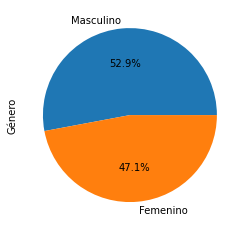

In [15]:
def Grafica_pastel():
  global database
  data_class=list(database.columns)
  numb=0
  for clm in data_class:
    print('{}: {}'.format(numb,clm))
    numb=numb+1
  bc=int(input('Graficar con: '))
  bc=data_class[bc]
  
  serie = database[bc].value_counts()
  serie.plot.pie(autopct='%1.1f%%')


0: Id
1: DNI
2: Nombre
3: Género
4: Tit.
5: Movil/Pag.
6: Cumpleaños
7: Fecha Inicio
8: Añadir
9: Tel.Oficina
10: Dpto.
11: Administrador
12: Nacionalidad
13: CardNo
14: Privilegio
Garficar con: 12


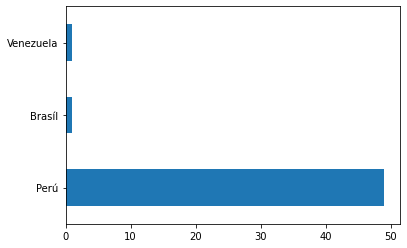

In [16]:
def Grafica_barras():
  global database
  data_class=list(database.columns)
  numb=0
  for clm in data_class:
    print('{}: {}'.format(numb,clm))
    numb=numb+1
  bc=int(input('Garficar con: '))
  bc=data_class[bc]
  
  serie = database[bc].sort_values(ascending=True).value_counts()
  serie.plot.barh()



0: Id
1: DNI
2: Nombre
3: Género
4: Tit.
5: Movil/Pag.
6: Cumpleaños
7: Fecha Inicio
8: Añadir
9: Tel.Oficina
10: Dpto.
11: Administrador
12: Nacionalidad
13: CardNo
14: Privilegio
Ingresa Y: 3
Ingresa X: 12


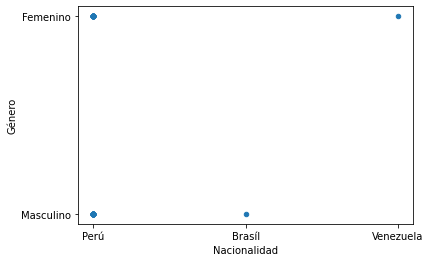

In [17]:
def Grafica_puntos():
  global database
  data_class=list(database.columns)
  numb=0
  for clm in data_class:
    print('{}: {}'.format(numb,clm))
    numb=numb+1
  y_label=int(input('Ingresa Y: '))
  x_label=int(input('Ingresa X: '))

  y_label=data_class[y_label]
  x_label=data_class[x_label]
  database.plot.scatter(y=y_label,x=x_label)
